In [5]:
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.pyplot import scatter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from shutil import rmtree
from shutil import copy
import pandas as pd
import numpy as np
import glob
import cv2
import os

In [6]:
link = "images/*.jpg"
dataset_paths = glob.glob(link)
images = {}

for image_path in dataset_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    images[image_path] = img.flatten();

print("The number of images : ", len(images))
print(images.get("images/1_1.jpg").shape)

The number of images :  100
(10000,)


In [7]:
df = pd.DataFrame([[sample] for _, sample in images.items()])
df.columns = ["images"]
df.index = images.keys()
df.head()

,images
images/36_4.jpg,"[95, 101, 105, 102, 105, 104, 99, 102, 105, 10..."
images/34_4.jpg,"[89, 100, 108, 103, 104, 104, 103, 105, 104, 1..."
images/20_2.jpg,"[25, 29, 32, 30, 31, 32, 33, 30, 31, 32, 31, 3..."
images/95_10.jpg,"[101, 113, 121, 113, 112, 112, 113, 116, 116, ..."
images/47_5.jpg,"[98, 111, 119, 109, 111, 113, 114, 114, 114, 1..."


In [8]:
data = np.array(list(df["images"]))
print(data.shape)

(100, 10000)


In [10]:
pca = PCA(n_components=5)
pca.fit(data)
data_pca=pca.transform(data)
print("old shape : ", data.shape)
print("new sahpe : ", data_pca.shape)

old shape :  (100, 10000)
new sahpe :  (100, 5)


In [13]:
data = data_pca

In [14]:
n_distributions = 10
gmm_model = GMM(n_components=n_distributions, covariance_type='tied')
gmm_model.fit(data)
gmm_labels = gmm_model.predict(data)

In [15]:
df["cluster"] = gmm_labels

df.head()

,images,cluster
images/36_4.jpg,"[95, 101, 105, 102, 105, 104, 99, 102, 105, 10...",8
images/34_4.jpg,"[89, 100, 108, 103, 104, 104, 103, 105, 104, 1...",8
images/20_2.jpg,"[25, 29, 32, 30, 31, 32, 33, 30, 31, 32, 31, 3...",1
images/95_10.jpg,"[101, 113, 121, 113, 112, 112, 113, 116, 116, ...",7
images/47_5.jpg,"[98, 111, 119, 109, 111, 113, 114, 114, 114, 1...",9


In [16]:
if os.path.exists("result/"):
    rmtree("result/")

for index, row in df.iterrows():
    source = index
    distination = "{}/{}/".format("result", row.get("cluster"))
    
    if not os.path.exists(distination):
        os.makedirs(distination)
    
    copy(source, distination)

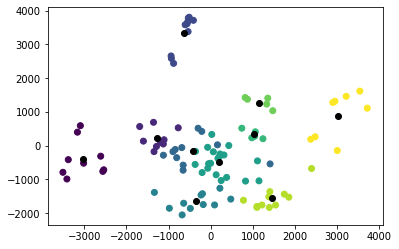

In [17]:
mean = gmm_model.means_
sorted_gs = np.argsort(gmm_model.means_[:, 0])
sorted_colors = list(range(n_distributions))
color_dict ={}
for i,g in enumerate(sorted_gs):
    color_dict[g] = sorted_colors[i]
c = np.array([color_dict[i] for i in gmm_labels])


plt.scatter(data[:,0],data[:,1],c = c)
plt.scatter(mean[:,0],mean[:,1],c='k')
plt.show()

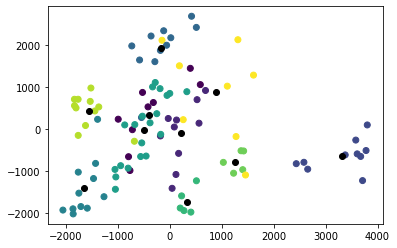

In [18]:
mean = gmm_model.means_
sorted_gs = np.argsort(gmm_model.means_[:, 0])
sorted_colors = list(range(n_distributions))
color_dict ={}
for i,g in enumerate(sorted_gs):
    color_dict[g] = sorted_colors[i]
c = np.array([color_dict[i] for i in gmm_labels])


plt.scatter(data[:,1],data[:,2],c = c)
plt.scatter(mean[:,1],mean[:,2],c='k')
plt.show()

In [19]:
gmm_model.means_.shape

(10, 5)

In [20]:
sorted_gs.shape

(10,)

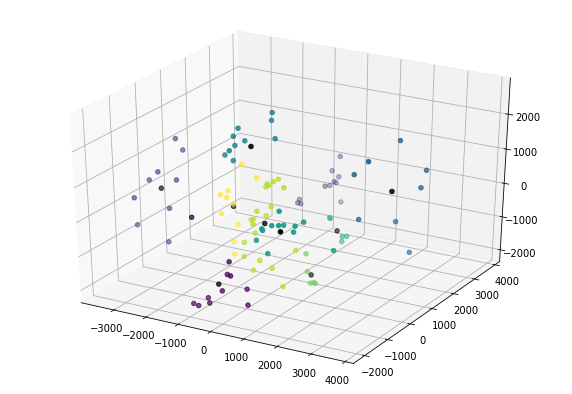

In [21]:
mean = gmm_model.means_
sorted_gs = np.argsort(gmm_model.means_[:, 3])
sorted_colors = list(range(n_distributions))
color_dict ={}

for i,g in enumerate(sorted_gs):
    color_dict[g] = sorted_colors[i]
c = np.array([color_dict[i] for i in gmm_labels])

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(data[:,0], data[:,1], data[:,2], c=c)
ax.scatter3D(mean[:,0], mean[:,1], mean[:,2], c='k')
plt.show()

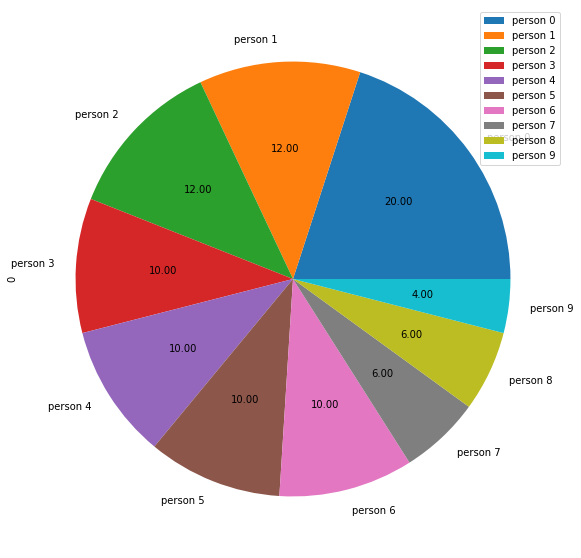

In [19]:
distributions = pd.DataFrame(list(df["cluster"].value_counts()), index=["person {}".format(i) for i in range(n_components)])
distributions.plot.pie(
    figsize=(16, 10),
    autopct="%.2f",
    subplots=True)
pass